#### 请于周日晚24：00之前以jupyter notebook的格式将作业提交至邮箱liyan_zjgsu@163.com

- （格式要求：请大家将题目和对应的解答写在**jupyter notebook**中，并在代码中写明注释。作业和邮件标题命名方式为：学号_姓名_python_course）

**Q1:**

1. 下面是一个批量下载百度图片的例子，请通过修改num，下载更多的图片，将num作为循环变量的参数写入程序中。
2. 当下载的图片很多时会发生各种错误，如何让程序稳定地运行？


In [ ]:
import requests
import re
import os
import time

pathname = 'D:\\图片\\'
if not os.path.exists(pathname):
    os.makedirs(pathname)
name = input('您要爬取的图片名称：')
num = 1
headers = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.125 Safari/537.36'}
url = 'https://image.baidu.com/search/flip?tn=baiduimage&ie=utf-8&word='+name+'&pn='+str((num-1)*60)
res = requests.get(url,headers=headers)
# print(res.request.url)

html = res.content.decode()
addlist = re.findall('"objURL":"(.*?)",',html)
# print(len(addlist))
# print(addlist)

j=0
for i in addlist:
    j = j +1
    img = requests.get(i)
    f = open(pathname+name+str(j)+'.jpg','ab')
    print('---------正在下载第'+str(j)+'张图片----------')
    f.write(img.content)
    f.close()
print('下载完成')

**Answer:**

In [ ]:
import requests
import re
import os
import time

pathname = 'D:\\图片\\'
if not os.path.exists(pathname):
    os.makedirs(pathname)
name = input('您要爬取的图片名称：')
num = input('您要爬取图片数量?，输入1/2/3...等于60/120/180...张图片。')
headers = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.125 Safari/537.36'}

count=0
for j in range(int(num)):
    url = 'https://image.baidu.com/search/flip?tn=baiduimage&ie=utf-8&word='+name+'&pn='+str(j*60)
    res = requests.get(url,headers=headers)
    # print(res.request.url)

    html = res.content.decode()
    addlist = re.findall('"objURL":"(.*?)",',html)
    # print(len(addlist))
    # print(addlist)

    for i in addlist:
        count = count +1
        try:
            img = requests.get(i)
        except Exception:
            print('第'+str(count)+'张图片无法下载------------')
            continue
        f = open(pathname+name+str(count)+'.jpg','ab')
        print('---------正在下载第'+str(count)+'张图片----------')
        f.write(img.content)
        f.close()
print('下载完成')

**Q2:**

1. 获取下述url中的新闻标题，提取关键词并计算情感评分，url = 'https://finance.sina.com.cn/roll/index.d.html?cid=56588&page=1'
2. 通过修改url中的page关键字批量获取多个页面的上述信息。
3. 将结果保存在dataframe中输出。

**Answer:**

In [9]:
import requests
from bs4 import  BeautifulSoup
import re
import numpy as np
import pandas as pd

def request_url(url):
    user_agent = 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/59.0.3071.109 Safari/537.36'
    headers = {'User-Agent': user_agent} 
    
    res = requests.get(url,headers=headers)
    res.encoding = 'utf-8'
    return res.text

df=pd.DataFrame(columns = ('news', 'sentiments')) ## 初始化一个空的DataFrame
for page in range(20):
    url = 'https://finance.sina.com.cn/roll/index.d.html?cid=56588&page='+str(page+1)
    ## 利用BeautifulSoup解析网页
    soup = BeautifulSoup(request_url(url), 'lxml')
    ## 利用find_all函数提取所需的新闻标题
    info = [inf.text for inf in soup.find_all('a', target = '_blank')][2:]
    ## 利用SnowNLP进行情感分析
    from snownlp import SnowNLP
    senti = [SnowNLP(text).sentiments for text in info]
    ## 将结果保存至dataframe中
    df = df.append(pd.DataFrame({'news': info, 'sentiments' : senti}))
    
df.reset_index(inplace = True, drop = True)
df

,news,sentiments
0,央行等6部委发布跨境人民币优化政策 产业迎来增量红利(附股),0.352927
1,春节不打烊：2021快递业务量预超千亿件 相关板块或收益(附股),0.078384
2,2021年1月5日涨停板早知道：七大利好有望发酵,0.717254
3,新能源汽车行业将维持高歌猛进态势 ModelY价格下调催化投资机会,0.961431
4,新能源汽车动力电池回收利用或提速 关注相关个股(附股),0.022063
...,...,...
895,国盛策略：科技成长二次进攻号角吹响 重点看好2方向,0.991865
896,券商外资股比限制将取消 百余家内地券商如何突围(股),0.203286
897,华泰证券：重卡行业发展趋势呈现积极变化 关注2只股,0.992991
898,申万宏源：疫情冲击下小家电需求侧亮点颇多 推荐3股,0.637827


**Q3：**
1. 从tushareAPI获取房地产行业的股票，并计算它们的收盘价收益率的的相关矩阵，日期为从去年到今年。
2. 计算上述这些股票的夏普比率并按从大到小排序。
3. 将夏普比率最大的股票价格与地产行业指数价格（通过对个股求平均获得）作线性回归，利用seaborn将结果可视化。

**Answer:**

<AxesSubplot:xlabel='x', ylabel='y'>

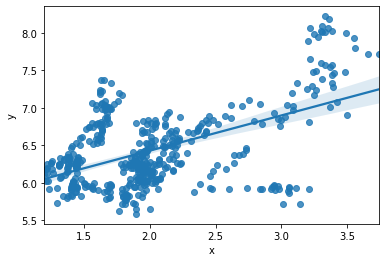

In [23]:
import tushare as ts
import pandas as pd

tushare_token = '1c8b06446534ae510c8c68e38fc248b99f89ac3814cb55645ae2be72'  # 请在 tushare.pro 网站注册并且告知学生身份，可以取得你的token
pro = ts.pro_api(tushare_token)
## 获取所有上市公司的股票列表
data = pro.stock_basic(exchange='', list_status='L', fields='ts_code,symbol,name,area,industry,list_date')
# print(data)
## 筛选出industry列中包含“地产”的行
estate = data[data['industry'].str.contains('地产')]
# print(estate)
## 得到地产行业的股票代码列表
codes = estate.ts_code.tolist()
# print(codes)

## 根据地产股票代码列表获取日线行情数据
df = []
for code in codes:
    df.append(pro.daily(ts_code=code, start_date='20190101', end_date='20210101').iloc[::-1,:].set_index('trade_date'))
# print(df)

## 将不同股票的数据表合并
stk=pd.concat(df0, axis=1, join='outer')['close']
stk.columns = codes
# print(len(stk))
coef = stk.pct_change().corr() ## 计算收益率的相关矩阵
# print(coef)

rf=0.03
sr = (stk.pct_change().mean()-rf/250)/stk.pct_change().std() ## 计算夏普比率
sr.sort_values(ascending = False) ## 从大到小排序

stock = stk[sr.idxmax()] ## 夏普比率最大的股票
# print(stock)
index = stk.mean(axis=1) ## 通过对个股求平均获得指数
# print(index)
df00 = pd.concat([stock, index], axis=1)
df00.rename(columns={0:'y', stock.name:'x'}, inplace = True)
# print(df00)

## 线性拟合
from statsmodels.formula.api import ols
model = ols("y ~ x", df00).fit()
# print(model.params)

## 可视化
import seaborn as sns
sns.regplot(y='y', x='x', data=df00)

**Q++:**
- 编写MACD指标（macd指标的定义请自行百度，或参考课件Time Series Analysis中的这个练习：）
    >**Exercise:**
    >1. 从tushare获取000001.SZ这只股票今年的日行情数据。
    >2. 绘制上述股票的12日指数滑动平均线(ema12)和26日指数滑动平均线(ema26)。
    >3. 计算时间序列dif = ema12 - ema26，以及dif序列的9日指数滑动平均线，后者命名为dea。
    >4. 绘制2x1的子图，子图1展示原始价格序列，子图2展示dif、dea以及macd=(dif-dea)x2。
- 根据课件quant_learn中的海龟交易策略的代码，绘制上述macd策略的净值曲线。
- 计算上述净值曲线的最大回撤。